Importing necessary libraries for Data Loading & Exploratory Data Analysis

Packages Used:
* matplotlib and seaborn - for plotting and visualization
* keras - for loading Fashion-MNIST dataset
* sklearn - for PCA decomposition, and features normalization
* numpy - for array operations

In [130]:
## Author - Lilly Kumari
import time
import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Loading the data using keras.datasets

In [116]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

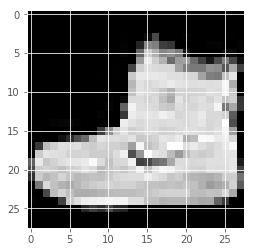

In [117]:
imgs = plt.imshow(x_train[0], cmap='gray')

Reshaping the loaded train & test datasets and converting datatype to float

In [118]:
x_train = x_train.reshape(y_train.shape[0], 784)
x_test = x_test.reshape(y_test.shape[0], 784)
x_train = x_train.astype(np.float32)
x_test = x_test.astype(np.float32)

In [119]:
print (x_train.shape, y_train.shape)
print (x_test.shape, y_test.shape)
print ("No of provided training examples = ", x_train.shape[0])
print ("No of provided test examples = ", x_test.shape[0])
print ("Overall number of classes/categories in the dataset = ", len(np.unique(y_train)))

(60000, 784) (60000,)
(10000, 784) (10000,)
No of provided training examples =  60000
No of provided test examples =  10000
Overall number of classes/categories in the dataset =  10


Plotting a grid of 16 training images

[0 1 2 3 4 5 6 7 8 9]


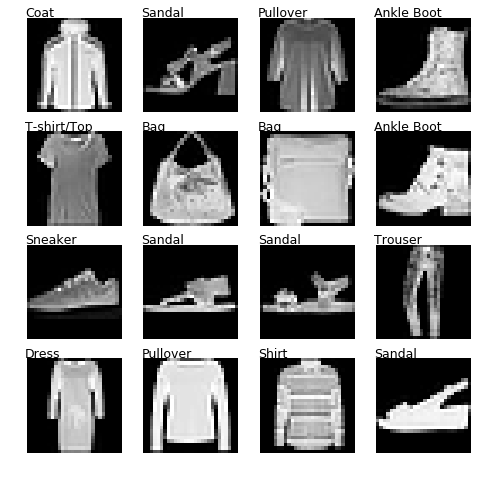

In [124]:
index = np.random.choice(x_train.shape[0], 16, replace=True)  
x_small_subset = x_train[index]
y_small_subset = y_train[index]

print (np.unique(y_small_subset))
labels = ['T-shirt/Top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

def plot_grid(images, targets):
    n = images.shape[0]
    num_row = int(np.ceil(n / 4))
    rows, axes = plt.subplots(num_row, 4)
    for i in range(num_row * 4):
        x = i % 4
        y = i // 4
        axes[x, y].axis('off')
        label = labels[targets[i]]
        axes[x, y].imshow(images[i].reshape(28,28), cmap='gray')
        axes[x, y].text(-1, -1, '%s' %label, fontsize=12.5)
        plt.gcf().set_size_inches(8, 8)  

plot_grid(np.squeeze(x_small_subset), y_small_subset)

Normalizing the dataset & getting a subset of 1000 examples for PCA decomposition

In [125]:
ss = StandardScaler()
x_train_norm = ss.fit_transform(x_train)

n = 1000
index = np.random.choice(x_train_norm.shape[0], n, replace=False)  
x_subset = x_train_norm[index]
y_subset = y_train[index]
print ("Classes found in chosen subset: ", np.unique(y_subset))

Classes found in chosen subset:  [0 1 2 3 4 5 6 7 8 9]


Performing PCA decomposition into 2 components

In [126]:
start_time = time.time()
pca = PCA(n_components=2)
pca_matrix = pca.fit(x_subset).transform(x_subset)
print ('Time taken for PCA: {} secs'.format(time.time()-start_time))

Time taken for PCA: 0.011289119720458984 secs


In [127]:
print ('Variance per Principal Component: {}'.format(pca.explained_variance_ratio_))

Variance per Principal Component: [0.20830418 0.1376214 ]


Making a scatter plot of chosen 1000 data points along 2 principal components

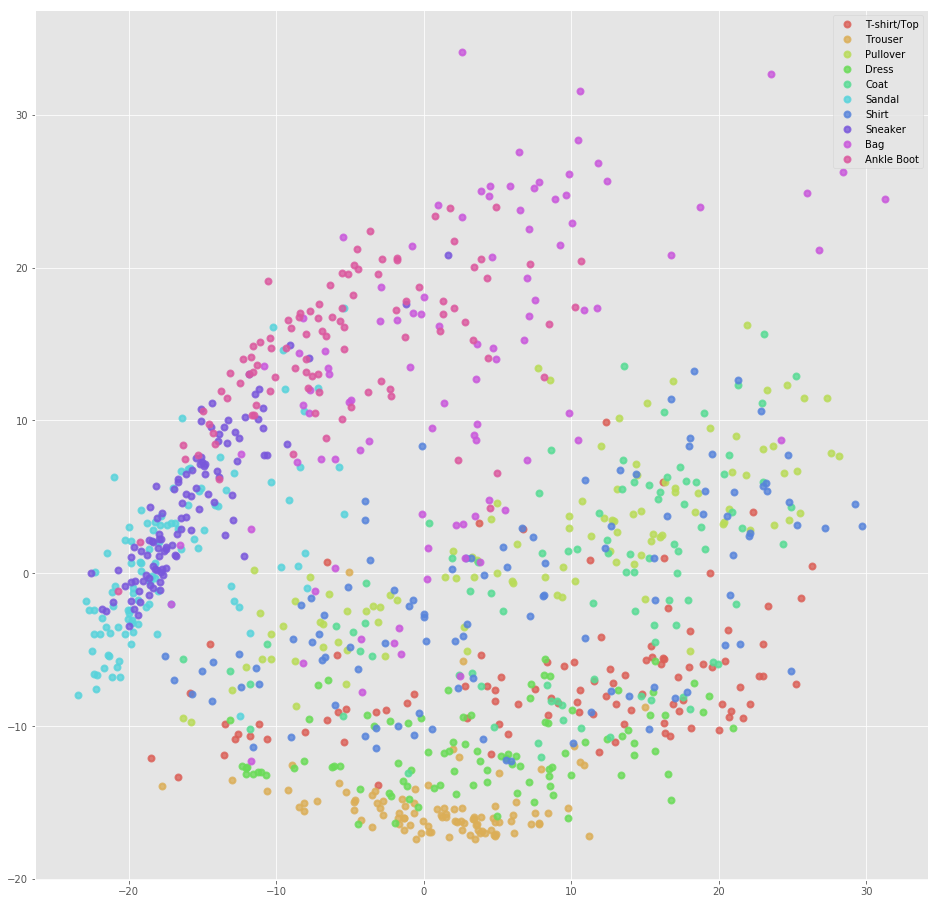

In [128]:
plt.figure(figsize = (16,16))
labels = ['T-shirt/Top', 'Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

num_classes = len(labels)
colors = np.array(sns.color_palette("hls", num_classes))
lw = 2

for i, color, label in zip([i for i in range(num_classes)], colors, labels):
    plt.scatter(pca_matrix[y_subset == i, 0], pca_matrix[y_subset == i, 1], color=color, alpha=.8, lw=lw,
                label=label)

plt.legend(loc='best', shadow=False, scatterpoints=1)
# plt.title('PCA-2 on Fashion-MNIST dataset')
plt.show()

Plotting a histogram showing the distribution of classes/labels across the training data

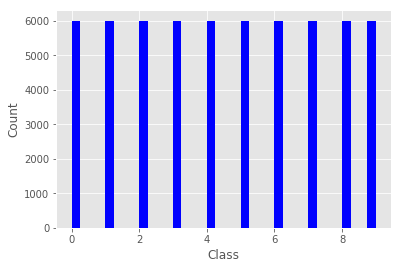

In [129]:
plt.hist(y_train, bins='auto', color='blue')
# plt.title('Label distribution in Training Data')
plt.xlabel('Class')
plt.ylabel('Count');